In [2]:
import re
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def filter_results(path, test="=== [Accuracy] H0: DP vs. ReuseKNN", method="UserKNN+Reuse", k=10, kind="one-tailed", q=None):
    file = open(path, 'r')
    line_cnt = 0
    filter_on = False
    q_filter_on = False
    q_case = False
    print("=== %s === " % test)
    results = defaultdict(list)
    for line in file.readlines():
        # TODO privacy vs. privacy risk
        if line.startswith("=== ["):
            if test in line:
                #print(line)
                filter_on = True
            else:
                filter_on = False
            continue
        """if line.startswith("=== ["):
            if test in line:
                print(line)
                filter_on = True
            else:
                filter_on = False
            continue"""
        
        # Neighborhood Growth
        if filter_on and line.startswith("===") and len(line) > 1:
            q_case = True
            line_k = int(re.search("k: (.*), q", line).group(1))
            line_q = int(re.search("q: (.*), sample size", line).group(1))
            line_ss = int(re.search("sample size: (.*) ===", line).group(1))
            
            if line_k == k and line_q == q:
                print(line)
                q_filter_on = True   
            else:
                q_filter_on = False
            continue
        
        # Accuracy, Privacy, Privacy Risk
        if filter_on and len(line) > 1:
            if q_filter_on:
                line_kind = re.search("\[(.*) MWU]", line).group(1)
                line_method = re.search("\] (.*):", line).group(1)
                if re.search(", (.*) \(p\),", line):
                    line_p = float(re.search(", (.*) \(p\),", line).group(1))
                    line_r = float(re.search("p\), (.*) \(r\)", line).group(1))
                
                if line_kind == kind and line_method == method:
                    print(line)
                    
                    results["p"].append(line_p)
                    results["r"].append(line_r)
                    results["ss"].append(line_ss)
            else:
                if not q_case:
                    line_kind = re.search("\[(.*) MWU]", line).group(1)
                    line_method = re.search("\] (.*) k", line).group(1)
                    line_k = int(re.search("k=(.*):", line).group(1))
                    line_p = float(re.search(", (.*) \(p\),", line).group(1))
                    line_r = float(re.search("p\), (.*) \(r\)", line).group(1))
                    

                    if line_kind == kind and line_method == method and line_k == k:
                        print(line)
                
                        results["p"].append(line_p)
                        results["r"].append(line_r)
        
        line_cnt += 1
    file.close()
    return results

In [62]:
path = 'protected/douban/significance_tests.txt'
t = "=== [Accuracy] H0: DP vs. ReuseKNN"
for k in [5, 10, 15, 20, 25, 30]:
    print(filter_results(path, test=t, method="Popularity", kind="two-tailed", k=k))

=== === [Accuracy] H0: DP vs. ReuseKNN === 
[two-tailed MWU] Popularity k=5: 15742979873.000000 (U), 0.000000 (p), -0.012286 (r)

[two-tailed MWU] Popularity k=5: 15797765253.500000 (U), 0.000000 (p), -0.009315 (r)

[two-tailed MWU] Popularity k=5: 15729604995.500000 (U), 0.000000 (p), -0.013011 (r)

[two-tailed MWU] Popularity k=5: 15748539803.000000 (U), 0.000000 (p), -0.011984 (r)

[two-tailed MWU] Popularity k=5: 15744327680.000000 (U), 0.000000 (p), -0.012212 (r)

defaultdict(<class 'list'>, {'p': [0.0, 0.0, 0.0, 0.0, 0.0], 'r': [-0.012286, -0.009315, -0.013011, -0.011984, -0.012212]})
=== === [Accuracy] H0: DP vs. ReuseKNN === 
[two-tailed MWU] Popularity k=10: 15901573632.000000 (U), 0.027587 (p), -0.003685 (r)

[two-tailed MWU] Popularity k=10: 15890987378.000000 (U), 0.010886 (p), -0.004259 (r)

[two-tailed MWU] Popularity k=10: 15913848148.000000 (U), 0.071051 (p), -0.003019 (r)

[two-tailed MWU] Popularity k=10: 15913363337.000000 (U), 0.068627 (p), -0.003046 (r)

[two-taile

In [46]:
path = 'unprotected/douban/significance_tests.txt'
ps = []
rs = []
ss = []
for q in range(1, 100+1):
    r = filter_results(path, test="Neighborhood Growth", method="Popularity", kind="one-tailed", k=10, q=q)
    if len(r):
        ps.append(np.max(r["p"]))
        rs.append(np.mean(r["r"]))
        ss.append(np.mean(r["ss"]))

=== Neighborhood Growth === 
=== k: 10, q: 1, sample size: 2498 ===

[one-tailed MWU] Popularity: 3120002.000000 (U), 0.500009 (p), 0.000000 (r)

=== k: 10, q: 1, sample size: 2498 ===

=== k: 10, q: 1, sample size: 2499 ===

[one-tailed MWU] Popularity: 3122500.500000 (U), 0.500009 (p), 0.000000 (r)

=== k: 10, q: 1, sample size: 2499 ===

=== k: 10, q: 1, sample size: 2496 ===

[one-tailed MWU] Popularity: 3115008.000000 (U), 0.500009 (p), 0.000000 (r)

=== k: 10, q: 1, sample size: 2496 ===

=== k: 10, q: 1, sample size: 2499 ===

[one-tailed MWU] Popularity: 3122500.500000 (U), 0.500010 (p), 0.000000 (r)

=== k: 10, q: 1, sample size: 2499 ===

=== k: 10, q: 1, sample size: 2499 ===

[one-tailed MWU] Popularity: 3122500.500000 (U), 0.500010 (p), 0.000000 (r)

=== k: 10, q: 1, sample size: 2499 ===

=== Neighborhood Growth === 
=== k: 10, q: 2, sample size: 2465 ===

[one-tailed MWU] Popularity: 1689131.500000 (U), 0.000000 (p), -0.384493 (r)

=== k: 10, q: 2, sample size: 2465 ===


=== k: 10, q: 11, sample size: 2008 ===

=== k: 10, q: 11, sample size: 1989 ===

[one-tailed MWU] Popularity: 25684.000000 (U), 0.000000 (p), -0.854673 (r)

=== k: 10, q: 11, sample size: 1989 ===

=== k: 10, q: 11, sample size: 1995 ===

[one-tailed MWU] Popularity: 17155.500000 (U), 0.000000 (p), -0.858452 (r)

=== k: 10, q: 11, sample size: 1995 ===

=== k: 10, q: 11, sample size: 1994 ===

[one-tailed MWU] Popularity: 21821.000000 (U), 0.000000 (p), -0.856412 (r)

=== k: 10, q: 11, sample size: 1994 ===

=== Neighborhood Growth === 
=== k: 10, q: 12, sample size: 1953 ===

[one-tailed MWU] Popularity: 19419.500000 (U), 0.000000 (p), -0.857097 (r)

=== k: 10, q: 12, sample size: 1953 ===

=== k: 10, q: 12, sample size: 1959 ===

[one-tailed MWU] Popularity: 18055.000000 (U), 0.000000 (p), -0.857767 (r)

=== k: 10, q: 12, sample size: 1959 ===

=== k: 10, q: 12, sample size: 1947 ===

[one-tailed MWU] Popularity: 18785.500000 (U), 0.000000 (p), -0.857332 (r)

=== k: 10, q: 12, sampl

=== k: 10, q: 21, sample size: 1657 ===

[one-tailed MWU] Popularity: 1770.500000 (U), 0.000000 (p), -0.864778 (r)

=== k: 10, q: 21, sample size: 1657 ===

=== k: 10, q: 21, sample size: 1662 ===

[one-tailed MWU] Popularity: 1721.500000 (U), 0.000000 (p), -0.864816 (r)

=== k: 10, q: 21, sample size: 1662 ===

=== Neighborhood Growth === 
=== k: 10, q: 22, sample size: 1646 ===

[one-tailed MWU] Popularity: 2365.500000 (U), 0.000000 (p), -0.864382 (r)

=== k: 10, q: 22, sample size: 1646 ===

=== k: 10, q: 22, sample size: 1640 ===

[one-tailed MWU] Popularity: 2309.500000 (U), 0.000000 (p), -0.864406 (r)

=== k: 10, q: 22, sample size: 1640 ===

=== k: 10, q: 22, sample size: 1635 ===

[one-tailed MWU] Popularity: 1726.500000 (U), 0.000000 (p), -0.864775 (r)

=== k: 10, q: 22, sample size: 1635 ===

=== k: 10, q: 22, sample size: 1633 ===

[one-tailed MWU] Popularity: 1505.000000 (U), 0.000000 (p), -0.864915 (r)

=== k: 10, q: 22, sample size: 1633 ===

=== k: 10, q: 22, sample size

=== k: 10, q: 31, sample size: 1415 ===

=== k: 10, q: 31, sample size: 1409 ===

[one-tailed MWU] Popularity: 357.500000 (U), 0.000000 (p), -0.865560 (r)

=== k: 10, q: 31, sample size: 1409 ===

=== Neighborhood Growth === 
=== k: 10, q: 32, sample size: 1401 ===

[one-tailed MWU] Popularity: 699.500000 (U), 0.000000 (p), -0.865254 (r)

=== k: 10, q: 32, sample size: 1401 ===

=== k: 10, q: 32, sample size: 1391 ===

[one-tailed MWU] Popularity: 510.500000 (U), 0.000000 (p), -0.865413 (r)

=== k: 10, q: 32, sample size: 1391 ===

=== k: 10, q: 32, sample size: 1406 ===

[one-tailed MWU] Popularity: 670.000000 (U), 0.000000 (p), -0.865285 (r)

=== k: 10, q: 32, sample size: 1406 ===

=== k: 10, q: 32, sample size: 1396 ===

[one-tailed MWU] Popularity: 661.500000 (U), 0.000000 (p), -0.865283 (r)

=== k: 10, q: 32, sample size: 1396 ===

=== k: 10, q: 32, sample size: 1383 ===

[one-tailed MWU] Popularity: 256.500000 (U), 0.000000 (p), -0.865637 (r)

=== k: 10, q: 32, sample size: 1383

=== k: 10, q: 41, sample size: 1221 ===

=== Neighborhood Growth === 
=== k: 10, q: 42, sample size: 1213 ===

[one-tailed MWU] Popularity: 356.500000 (U), 0.000000 (p), -0.865427 (r)

=== k: 10, q: 42, sample size: 1213 ===

=== k: 10, q: 42, sample size: 1203 ===

[one-tailed MWU] Popularity: 271.500000 (U), 0.000000 (p), -0.865521 (r)

=== k: 10, q: 42, sample size: 1203 ===

=== k: 10, q: 42, sample size: 1207 ===

[one-tailed MWU] Popularity: 321.000000 (U), 0.000000 (p), -0.865465 (r)

=== k: 10, q: 42, sample size: 1207 ===

=== k: 10, q: 42, sample size: 1211 ===

[one-tailed MWU] Popularity: 306.000000 (U), 0.000000 (p), -0.865485 (r)

=== k: 10, q: 42, sample size: 1211 ===

=== k: 10, q: 42, sample size: 1205 ===

[one-tailed MWU] Popularity: 93.000000 (U), 0.000000 (p), -0.865735 (r)

=== k: 10, q: 42, sample size: 1205 ===

=== Neighborhood Growth === 
=== k: 10, q: 43, sample size: 1190 ===

[one-tailed MWU] Popularity: 359.000000 (U), 0.000000 (p), -0.865405 (r)

=== k: 


=== k: 10, q: 52, sample size: 1046 ===

[one-tailed MWU] Popularity: 123.500000 (U), 0.000000 (p), -0.865623 (r)

=== k: 10, q: 52, sample size: 1046 ===

=== k: 10, q: 52, sample size: 1050 ===

[one-tailed MWU] Popularity: 101.000000 (U), 0.000000 (p), -0.865661 (r)

=== k: 10, q: 52, sample size: 1050 ===

=== k: 10, q: 52, sample size: 1068 ===

[one-tailed MWU] Popularity: 80.000000 (U), 0.000000 (p), -0.865701 (r)

=== k: 10, q: 52, sample size: 1068 ===

=== Neighborhood Growth === 
=== k: 10, q: 53, sample size: 1035 ===

[one-tailed MWU] Popularity: 161.000000 (U), 0.000000 (p), -0.865556 (r)

=== k: 10, q: 53, sample size: 1035 ===

=== k: 10, q: 53, sample size: 1047 ===

[one-tailed MWU] Popularity: 105.500000 (U), 0.000000 (p), -0.865652 (r)

=== k: 10, q: 53, sample size: 1047 ===

=== k: 10, q: 53, sample size: 1034 ===

[one-tailed MWU] Popularity: 130.000000 (U), 0.000000 (p), -0.865606 (r)

=== k: 10, q: 53, sample size: 1034 ===

=== k: 10, q: 53, sample size: 1037

=== k: 10, q: 62, sample size: 923 ===

=== k: 10, q: 62, sample size: 913 ===

[one-tailed MWU] Popularity: 26.000000 (U), 0.000000 (p), -0.865734 (r)

=== k: 10, q: 62, sample size: 913 ===

=== Neighborhood Growth === 
=== k: 10, q: 63, sample size: 905 ===

[one-tailed MWU] Popularity: 123.500000 (U), 0.000000 (p), -0.865525 (r)

=== k: 10, q: 63, sample size: 905 ===

=== k: 10, q: 63, sample size: 913 ===

[one-tailed MWU] Popularity: 104.000000 (U), 0.000000 (p), -0.865572 (r)

=== k: 10, q: 63, sample size: 913 ===

=== k: 10, q: 63, sample size: 911 ===

[one-tailed MWU] Popularity: 62.500000 (U), 0.000000 (p), -0.865657 (r)

=== k: 10, q: 63, sample size: 911 ===

=== k: 10, q: 63, sample size: 908 ===

[one-tailed MWU] Popularity: 35.500000 (U), 0.000000 (p), -0.865713 (r)

=== k: 10, q: 63, sample size: 908 ===

=== k: 10, q: 63, sample size: 904 ===

[one-tailed MWU] Popularity: 20.500000 (U), 0.000000 (p), -0.865743 (r)

=== k: 10, q: 63, sample size: 904 ===

=== Neighbo

=== k: 10, q: 73, sample size: 790 ===

[one-tailed MWU] Popularity: 59.500000 (U), 0.000000 (p), -0.865586 (r)

=== k: 10, q: 73, sample size: 790 ===

=== k: 10, q: 73, sample size: 788 ===

[one-tailed MWU] Popularity: 46.000000 (U), 0.000000 (p), -0.865623 (r)

=== k: 10, q: 73, sample size: 788 ===

=== k: 10, q: 73, sample size: 793 ===

[one-tailed MWU] Popularity: 16.000000 (U), 0.000000 (p), -0.865708 (r)

=== k: 10, q: 73, sample size: 793 ===

=== k: 10, q: 73, sample size: 788 ===

[one-tailed MWU] Popularity: 8.000000 (U), 0.000000 (p), -0.865728 (r)

=== k: 10, q: 73, sample size: 788 ===

=== Neighborhood Growth === 
=== k: 10, q: 74, sample size: 772 ===

[one-tailed MWU] Popularity: 145.000000 (U), 0.000000 (p), -0.865324 (r)

=== k: 10, q: 74, sample size: 772 ===

=== k: 10, q: 74, sample size: 780 ===

[one-tailed MWU] Popularity: 60.000000 (U), 0.000000 (p), -0.865577 (r)

=== k: 10, q: 74, sample size: 780 ===

=== k: 10, q: 74, sample size: 779 ===

[one-tailed M

=== k: 10, q: 83, sample size: 694 ===

[one-tailed MWU] Popularity: 2.500000 (U), 0.000000 (p), -0.865705 (r)

=== k: 10, q: 83, sample size: 694 ===

=== k: 10, q: 83, sample size: 697 ===

[one-tailed MWU] Popularity: 0.000000 (U), 0.000000 (p), -0.865715 (r)

=== k: 10, q: 83, sample size: 697 ===

=== Neighborhood Growth === 
=== k: 10, q: 84, sample size: 669 ===

[one-tailed MWU] Popularity: 139.000000 (U), 0.000000 (p), -0.865164 (r)

=== k: 10, q: 84, sample size: 669 ===

=== k: 10, q: 84, sample size: 688 ===

[one-tailed MWU] Popularity: 11.000000 (U), 0.000000 (p), -0.865671 (r)

=== k: 10, q: 84, sample size: 688 ===

=== k: 10, q: 84, sample size: 685 ===

[one-tailed MWU] Popularity: 0.000000 (U), 0.000000 (p), -0.865710 (r)

=== k: 10, q: 84, sample size: 685 ===

=== k: 10, q: 84, sample size: 683 ===

[one-tailed MWU] Popularity: 2.500000 (U), 0.000000 (p), -0.865699 (r)

=== k: 10, q: 84, sample size: 683 ===

=== k: 10, q: 84, sample size: 690 ===

[one-tailed MWU]

=== k: 10, q: 94, sample size: 609 ===

[one-tailed MWU] Popularity: 132.000000 (U), 0.000000 (p), -0.865054 (r)

=== k: 10, q: 94, sample size: 609 ===

=== k: 10, q: 94, sample size: 619 ===

[one-tailed MWU] Popularity: 3.500000 (U), 0.000000 (p), -0.865660 (r)

=== k: 10, q: 94, sample size: 619 ===

=== k: 10, q: 94, sample size: 605 ===

[one-tailed MWU] Popularity: 0.000000 (U), 0.000000 (p), -0.865668 (r)

=== k: 10, q: 94, sample size: 605 ===

=== k: 10, q: 94, sample size: 601 ===

[one-tailed MWU] Popularity: 0.000000 (U), 0.000000 (p), -0.865665 (r)

=== k: 10, q: 94, sample size: 601 ===

=== k: 10, q: 94, sample size: 604 ===

[one-tailed MWU] Popularity: 0.000000 (U), 0.000000 (p), -0.865667 (r)

=== k: 10, q: 94, sample size: 604 ===

=== Neighborhood Growth === 
=== k: 10, q: 95, sample size: 602 ===

[one-tailed MWU] Popularity: 135.000000 (U), 0.000000 (p), -0.865021 (r)

=== k: 10, q: 95, sample size: 602 ===

=== k: 10, q: 95, sample size: 605 ===

[one-tailed MWU

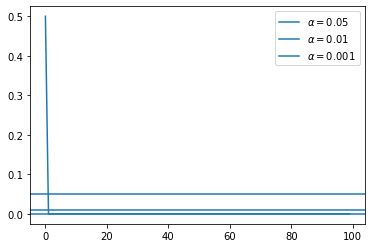

In [47]:
%matplotlib inline
plt.plot(ps)
plt.axhline(y=0.05, label=r"$\alpha=0.05$")
plt.axhline(y=0.01, label=r"$\alpha=0.01$")
plt.axhline(y=0.001, label=r"$\alpha=0.001$")
plt.legend()

In [48]:
np.where(np.array(ps) < 0.05)[0].min() + 1, np.where(np.array(ps) < 0.05)[0].max() + 1

(2, 100)

In [49]:
np.where(np.array(ps) < 0.01)[0].min() + 1, np.where(np.array(ps) < 0.01)[0].max() + 1

(2, 100)

In [50]:
np.where(np.array(ps) < 0.001)[0].min() + 1, np.where(np.array(ps) < 0.001)[0].max() + 1

(2, 100)

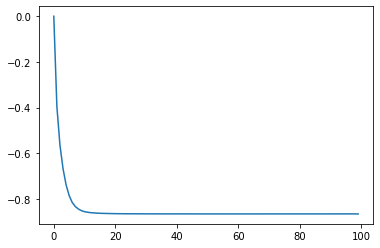

In [51]:
plt.plot(rs)

In [16]:
%matplotlib qt
plt.plot(ss)